<a href="https://colab.research.google.com/github/ClaudiaJean/crypto/blob/main/%EC%BD%94%EC%9D%B8%EB%93%A4%EA%B0%84%EC%9D%98_%EC%83%81%EB%8C%80%EA%B0%80%EA%B2%A9_%EB%B3%80%ED%99%94_%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to get cryptocurrency price data

- 비트 차트 설명하는 중간에 이더랑 리플 같이 보는 파트가 있던데요. 
즉 "코인들간의 상대적인 가격변화" 이거 은근 중요한 인사이트를 주는데 말이죠. 
그래서 파이썬(Python)으로 한번 만들어 봤어요. 

- 내가 짠 코드라서 바로 돌릴 수는 없고 이걸 본인 구글 드라이브에 카피를 해야됨. 
(File 탭 누른 후, "save a copy in Drive" 클릭하면 본인 계정에 저장되고 그때부턴 그냥 돌려도 됨) 


Reference: https://youtu.be/dnrJ4zwCADM

In [ ]:
# 이 부부은 묻지도 따지지도 말고 그냥 돌리세요. 옆에 '플레이' 버튼처럼 생긴 거 그냥 누르면 됨. 
import numpy as np
import pandas as pd
import pandas_datareader as pdr 
import pandas_datareader.data as web 

import datetime as dt
import matplotlib.pyplot as plt

# options 
pd.options.display.max_columns = None 

In [ ]:
#================= 가격 데이터 불러오기 ============================ 
# 다른 코인가격을 불러오고 싶으면 아래 라인 카피 후 3군데 (BTC) 이름을 업데이트 해 줘야 함. 
BTC = web.DataReader('BTC-USD', data_source = 'yahoo', start = '2010-01-01', end ='2020-12-30')['Adj Close'].rename('BTC')
ETH = web.DataReader('ETH-USD', data_source = 'yahoo', start = '2010-01-01', end ='2020-12-30')['Adj Close'].rename('ETH')
XRP = web.DataReader('XRP-USD', data_source = 'yahoo', start = '2010-01-01', end ='2020-12-30')['Adj Close'].rename('XRP')
print(BTC)
print(ETH)
print(XRP)


#===================== 가격 데이터 합치기  =========================
from functools import reduce
import pandas as pd

dfs = [BTC, ETH, XRP ]  ## 코인 종류에 맞춰 업데이트 해 줄 것 ######
coins = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, left_index=True, right_index=True, how='inner'), dfs)

print(coins)



Date
2014-09-16      457.334015
2014-09-17      424.440002
2014-09-18      394.795990
2014-09-19      408.903992
2014-09-20      398.821014
                  ...     
2020-10-31    13780.995117
2020-11-01    13737.109375
2020-11-02    13550.489258
2020-11-03    13950.300781
2020-11-04    13886.385742
Name: BTC, Length: 2241, dtype: float64
Date
2015-08-06      2.772120
2015-08-07      0.753325
2015-08-08      0.701897
2015-08-09      0.708448
2015-08-10      1.067860
                 ...    
2020-10-31    386.590332
2020-11-01    396.358185
2020-11-02    383.156738
2020-11-03    387.602173
2020-11-04    383.431702
Name: ETH, Length: 1917, dtype: float64
Date
2014-09-16    0.005399
2014-09-17    0.005135
2014-09-18    0.004942
2014-09-19    0.004772
2014-09-20    0.004570
                ...   
2020-10-31    0.239744
2020-11-01    0.239797
2020-11-02    0.235421
2020-11-03    0.239510
2020-11-04    0.234078
Name: XRP, Length: 2241, dtype: float64
                     BTC         ETH    

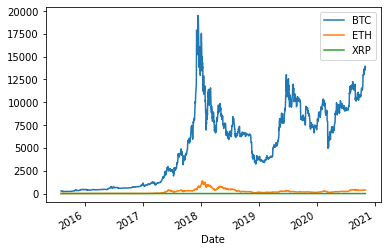

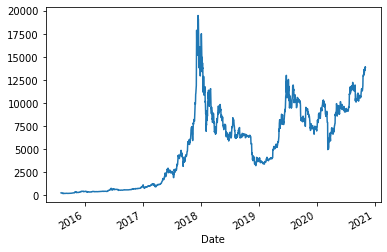

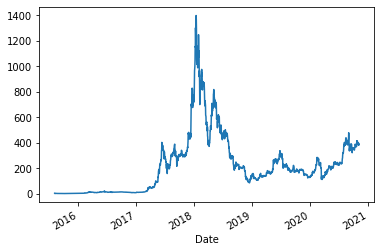

In [ ]:
#======== 그래프 ==========================

# 1. 가격 그래프
coins.plot()  
plt.show()
# 문제점: 가격대가 달라 직접 비교가 난망. 




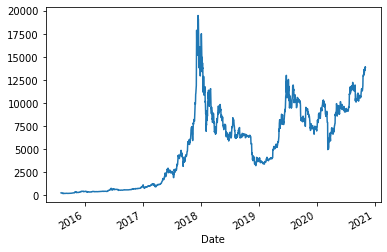

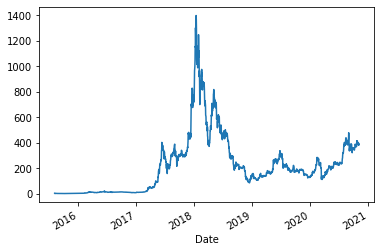

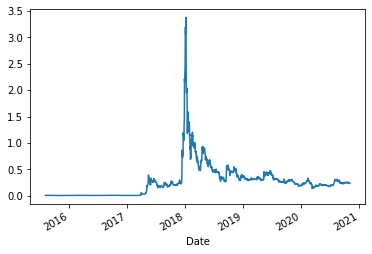

In [ ]:
# 각자 그래프 
coins['BTC'].plot()
plt.show()
coins['ETH'].plot()
plt.show()
coins['XRP'].plot()
plt.show()

# 이전보단 낫지만 여전히 정확한 비교가 좀 어려움. 

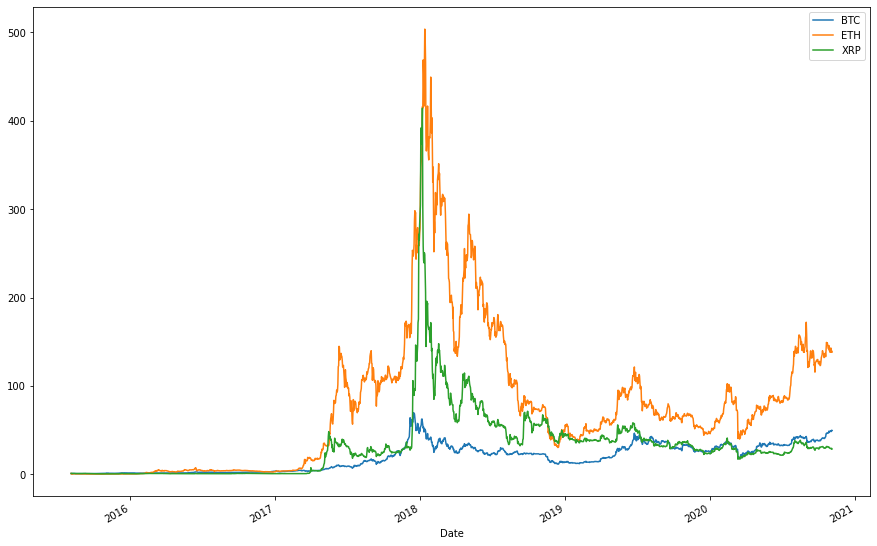

In [ ]:
# 시작점을 100%로 만들어서 함께 그래프를 그려보자요
coins_relative = coins / coins.iloc[0 , : ]

coins_relative.plot()
plt.show()

# 그림 사이즈 바꿔보자요. 
coins_relative.plot(figsize = (15, 10))
plt.show()

# 너무 장기간이라 여전히 눈에 잘 안 들어오니 기간을 정해서 상대적인 가격변동을 알아보자요. 


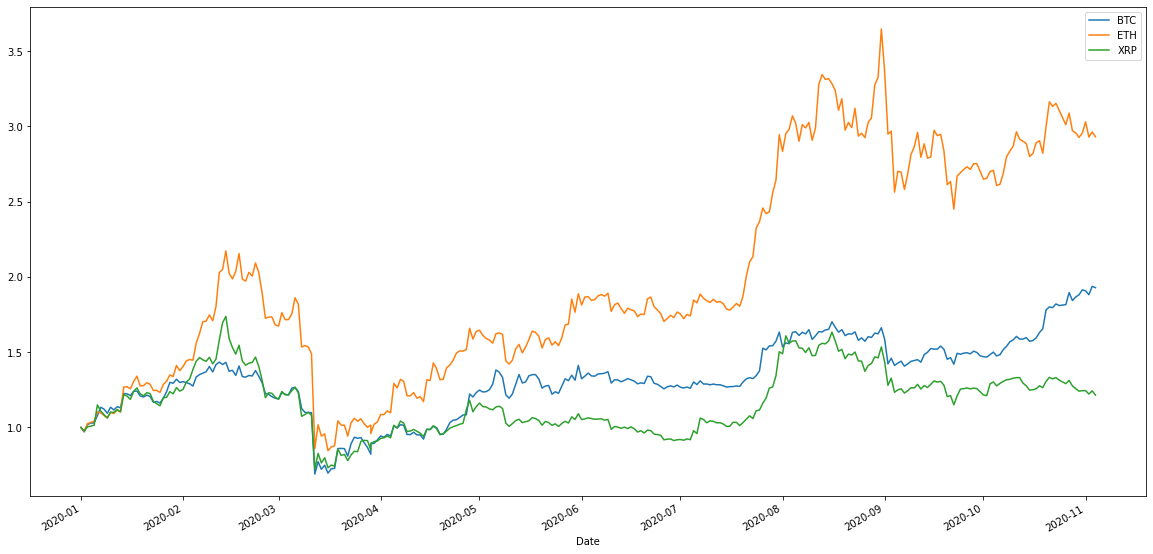

                 BTC       ETH       XRP
Date                                    
2020-01-01  1.000000  1.000000  1.000000
2020-01-02  0.970181  0.974069  0.975996
2020-01-03  1.020098  1.025762  1.004431
2020-01-04  1.029233  1.032625  1.008761
2020-01-05  1.029325  1.041855  1.014895
...              ...       ...       ...
2020-10-31  1.913981  2.955538  1.244342
2020-11-01  1.907886  3.030215  1.244619
2020-11-02  1.881967  2.929288  1.221901
2020-11-03  1.937495  2.963274  1.243127
2020-11-04  1.928618  2.931390  1.214932

[315 rows x 3 columns]


In [ ]:
# 기간을 지정해서 상대적인 가격 변화 살펴보기 
start_date = '2020-01-01' # 이 부분 바꿔가면서 놀아보자요. 
end_date = '2020-12-30'
coins_subperiod = coins[start_date:end_date]
coins_subperiod_relative = coins_subperiod/coins_subperiod.iloc[0,:]

# df2.plot() 
coins_subperiod_relative.plot(figsize=(20, 10))  # figure size
plt.show()



print(coins_subperiod_relative)


# 향후 개선점: 
# 1) 주봉이나 월봉으로도 볼 수 있음 좋겠다.
# 2) 이동 평균선을 넣고 싶다. 
# 3) 또 뭐가 있을까요? 추가 하고 싶은 점이 있으면 알려주세요. 어디다가? 다음 섹션을 보셈. 


### 향후 개선점: 
  - 주봉이나 월봉으로도 볼 수 있음 좋겠다.
  - 이동 평균선을 넣고 싶다. 
  - 또 뭐가 있을까요? 추가 하고 싶은 점이 있으면 알려주세요. 어디다가? 
  -  [CJ채널: 34번 영상](https://www.youtube.com/watch?v=Nxvdel4BwMc) 댓글란에다... ^^
